In [1]:
# import pandas as pd # TODO: find uses later
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MIN_CUE_WGT, MAX_CUE_WGT = 420, 550  # grams
MIN_BALL_WGT, MAX_BALL_WGT = 205, 220  # grams
MIN_BR_LEN, MAX_BR_LEN = 1, 25  # centimeters
MIN_VEL, MAX_VEL = 0.05, 3.5  # m/s, from caromball.com

In [3]:
cue_weights = np.linspace(MIN_CUE_WGT, MAX_CUE_WGT, num=MAX_CUE_WGT - MIN_CUE_WGT, dtype=np.int16)
cue_weights

array([420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432,
       433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445,
       446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458,
       459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471,
       472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484,
       485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497,
       498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510,
       511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523,
       524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536,
       537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 550],
      dtype=int16)

In [17]:
proj_vel = np.linspace(MIN_VEL, MAX_VEL, num=50)
proj_vel

array([0.05      , 0.12040816, 0.19081633, 0.26122449, 0.33163265,
       0.40204082, 0.47244898, 0.54285714, 0.61326531, 0.68367347,
       0.75408163, 0.8244898 , 0.89489796, 0.96530612, 1.03571429,
       1.10612245, 1.17653061, 1.24693878, 1.31734694, 1.3877551 ,
       1.45816327, 1.52857143, 1.59897959, 1.66938776, 1.73979592,
       1.81020408, 1.88061224, 1.95102041, 2.02142857, 2.09183673,
       2.1622449 , 2.23265306, 2.30306122, 2.37346939, 2.44387755,
       2.51428571, 2.58469388, 2.65510204, 2.7255102 , 2.79591837,
       2.86632653, 2.93673469, 3.00714286, 3.07755102, 3.14795918,
       3.21836735, 3.28877551, 3.35918367, 3.42959184, 3.5       ])

In [18]:
xv, yv = np.meshgrid(cue_weights, proj_vel)

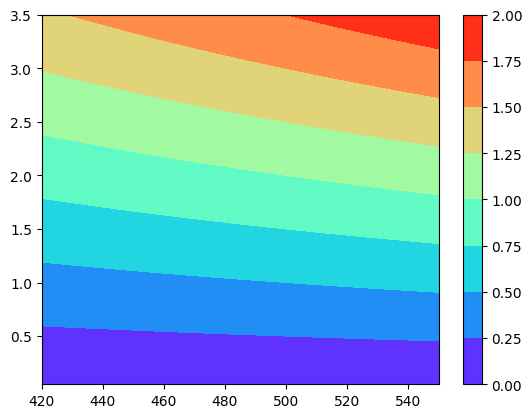

In [26]:
fv = (xv / 1000) * yv  # millinewtons (mN)
# as explained by Bard, https://g.co/bard/share/5a3135633c24
# the 2mN at top is too weak

plt.contourf(xv, yv, fv, cmap='rainbow')
plt.colorbar()
plt.show()

seems F=mv is not correct [as it represents the internal force of object in motion instead]

now try applying Impulse-Momentum, https://openstax.org/books/physics/pages/8-1-linear-momentum-force-and-impulse

mainly we have 𝐅net=𝑚𝐚 and Δ𝐯/Δ𝑡=𝐚 with
- v0 and t0 = 0
- Δ𝐯 eq proj_vel
- Δt will range from 0.5s to 3s

In [30]:
# dtime = np.arange(0.5, 3, step=0.1)  # ideal
dtime = np.arange(1, 3, step=0.1)  # realistic

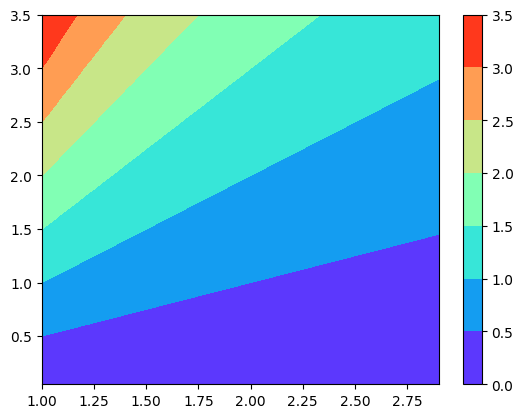

In [31]:
xv, yv =  np.meshgrid(proj_vel, dtime)
acc = xv / yv  # m/(s**2)
# yv is time deltas so plotted as x axis for better perception
plt.contourf(yv, xv, acc, cmap='rainbow')
plt.colorbar()
plt.show()